# Z-scores
- In this lesson, we will learn to use z-scores to describe the location of a value within a distribution. Z-scores are useful for comparing values coming from different distributions with different means and standard deviations.


- We will also learn to standardize distributions and discussed a few situations where that might be useful. It's worth mentioning that standardization is also useful for some machine learning algorithms that we'll learn about in later courses. Also, z-scores in general are key elements in understanding confidence intervals and hypothesis testing, which we'll discuss in later courses.


- We will continue to use the AmesHousing_1.txt dataset for our purpose.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_loc = 'D:/Dataquest/Dataquest 2022 Learning/Datasets/'
df = pd.read_table(dataset_loc + 'AmesHousing_1.txt')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
# Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:
sample = df['SalePrice'].sample(1,random_state=0)
print(sample)

mean_price = df['SalePrice'].mean()
print(f'Average Selling Price is {mean_price}')

std_price = df['SalePrice'].std(ddof=0)
print(f'Standard Deviation is {std_price}')

2216    220000
Name: SalePrice, dtype: int64
Average Selling Price is 180796.0600682594
Standard Deviation is 79873.05865192247


- The sampled house (220,000) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

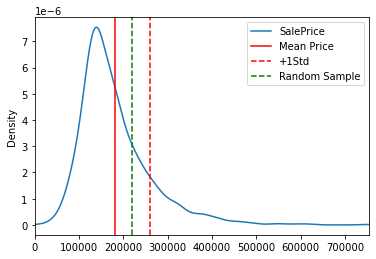

In [33]:
df['SalePrice'].plot.kde(xlim=(0,df['SalePrice'].max()))
plt.axvline(mean_price,label='Mean Price',color='red')
plt.axvline(mean_price + std_price,label='+1Std',color='red',linestyle='--')
plt.axvline(220000,label='Random Sample',color='green',linestyle='--')
plt.legend()

In [34]:
st_devs_away= (220000-mean_price) / std_price
st_devs_away
print(f'220000 is about {round(st_devs_away,1)} standard deviation from the mean')

220000 is about 0.5 standard deviation from the mean


Let's try to describe this process algebraically: for any value **x** in a population with mean **μ** and standard deviation **σ**, the number of standard deviations away from the mean is given by the formula below, where we denote the number of **standard deviations away from the mean with z**:

## z = (x - μ) / σ   ==> For population Z-score

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the   **z-score**. We'll use the term "z-score" throughout our courses

Z-scores can also be defined fairly easy for samples. For any value x in a sample with **mean $\bar{x}$** and standard deviation **s** (with Bessel's correction), the z-score z is given by the formula:

## z = (x - $\bar{x}$ ) / s  ==> For sample Z-score
